In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
import statsmodels.api as sm




In [5]:
df = pd.read_csv("../data/raw/data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


D:\Anaconda\envs\geo_env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
D:\Anaconda\envs\geo_env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


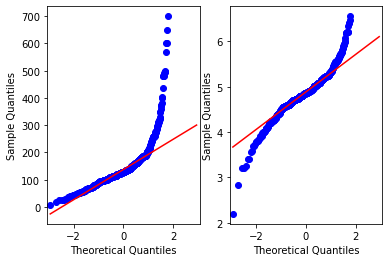

In [6]:
fig,axs = plt.subplots(1,2)
sm.qqplot(df.LoanAmount,line="q",ax=axs[0])
sm.qqplot(np.log(df.LoanAmount),line="q",ax=axs[1])
plt.show()

D:\Anaconda\envs\geo_env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
D:\Anaconda\envs\geo_env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


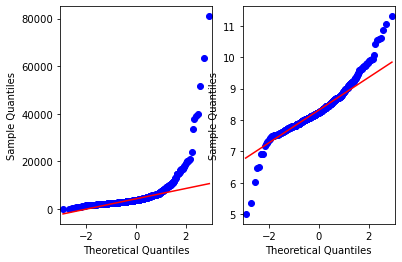

In [7]:
fig,axs = plt.subplots(1,2)
sm.qqplot(df.ApplicantIncome,line="q",ax=axs[0])
sm.qqplot(np.log(df.ApplicantIncome),line="q",ax=axs[1])
plt.show()

In [8]:
df.LoanAmount = np.log(df.LoanAmount)
df["TotalApplicantIncome"] = np.log(df.ApplicantIncome+df.CoapplicantIncome)
df.ApplicantIncome = np.log(df.ApplicantIncome)

In [9]:
df.drop(columns=['CoapplicantIncome','Loan_ID','Loan_Amount_Term'],inplace=True)

In [12]:
df.to_csv(r'../data/interim/2_feature_engineered/1_base_data.csv',index=False)